In [1]:
import pandas as pd
import numpy as np

In [4]:
pulls = pd.read_csv('pulls.csv')

In [8]:
pull_files = pd.read_csv('pull_files.csv')

In [9]:
pulls

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z
...,...,...,...
6195,547941,xeno-by,2011-12-01T16:16:42Z
6196,547354,szeiger,2011-12-01T14:03:23Z
6197,547150,odersky,2011-12-01T12:39:40Z
6198,547003,robinst,2011-12-01T11:42:26Z


In [10]:
pull_files

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java
...,...,...
85583,547354,test/files/run/bitsets.check
85584,547354,test/files/run/bitsets.scala
85585,547150,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,src/library/scala/reflect/api/Trees.scala


In [57]:
merged_df = pd.merge(pulls,pull_files,how = 'outer', on = 'pid')

In [58]:
merged_df

,pid,user,date,file
0,163314316,hrhino,2018-01-16T23:29:16Z,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16T23:29:16Z,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16T23:29:16Z,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16T23:29:16Z,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16T23:29:16Z,test/files/run/t8348/TableColumn.java
...,...,...,...,...
85604,547354,szeiger,2011-12-01T14:03:23Z,test/files/run/bitsets.scala
85605,547150,odersky,2011-12-01T12:39:40Z,src/compiler/scala/tools/nsc/transform/LiftCod...
85606,547150,odersky,2011-12-01T12:39:40Z,src/library/scala/reflect/api/Trees.scala
85607,547003,robinst,2011-12-01T11:42:26Z,README.rst


In [59]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [60]:
merged_df['date'] = merged_df['date'].dt.tz_convert('UTC')

In [61]:
merged_df

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
...,...,...,...,...
85604,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.scala
85605,547150,odersky,2011-12-01 12:39:40+00:00,src/compiler/scala/tools/nsc/transform/LiftCod...
85606,547150,odersky,2011-12-01 12:39:40+00:00,src/library/scala/reflect/api/Trees.scala
85607,547003,robinst,2011-12-01 11:42:26+00:00,README.rst


In [64]:
merged_df['month'] = merged_df['date'].dt.month

In [66]:
merged_df['year']= merged_df['date'].dt.year

In [101]:
merged_df.head(15)

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java,1,2018
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala,1,2018
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala,1,2018
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...,1,2018
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....,1,2018


<AxesSubplot:xlabel='year,month'>

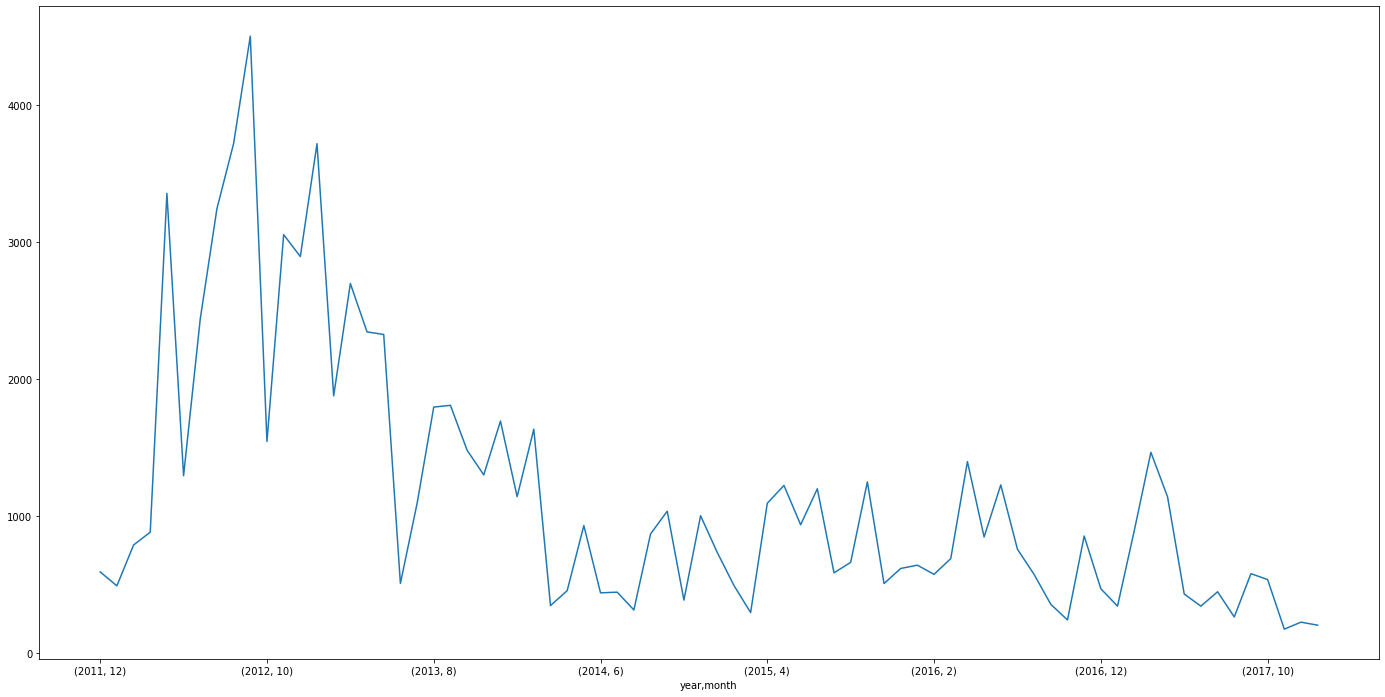

In [74]:
merged_df.groupby(['year','month'])['pid'].count().plot(figsize=(24,12))

<AxesSubplot:ylabel='Frequency'>

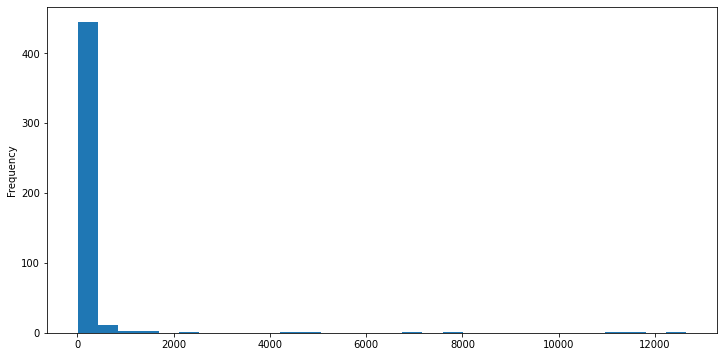

In [84]:
merged_df.groupby(['user'])['pid'].count().plot(kind = 'hist', bins = 30, figsize = (12,6))

In [95]:
merged_df.sort_values(by = ['date'],ascending=False).head(15)['file']

0                       test/files/pos/t5638/Among.java
4                 test/files/run/t8348/TableColumn.java
6                       test/files/run/t8348/Test.scala
5             test/files/run/t8348/TableColumnImpl.java
1                      test/files/pos/t5638/Usage.scala
3                            test/files/run/t8348.check
2                            test/files/pos/t9291.scala
7               src/library/scala/concurrent/Lock.scala
8     src/compiler/scala/tools/nsc/profile/AsyncHelp...
9     src/compiler/scala/tools/nsc/profile/Profiler....
10    src/compiler/scala/tools/nsc/backend/jvm/BCode...
11    src/compiler/scala/tools/nsc/symtab/classfile/...
12    src/reflect/scala/reflect/internal/pickling/By...
13    src/compiler/scala/reflect/reify/phases/Calcul...
14                       src/library/scala/Predef.scala
Name: file, dtype: object

In [118]:
merged_df[merged_df['file'] == 'src/compiler/scala/reflect/reify/phases/Calculate.scala'].value_counts('user')[0:3]

user
xeno-by     11
retronym     5
soc          4
dtype: int64

In [142]:
merged_df[merged_df['file'] == 'src/compiler/scala/reflect/reify/phases/Calculate.scala'].groupby(['date'])['user'].value_counts().sort_index(ascending = False)[0:10]

date                       user        
2018-01-14 19:16:16+00:00  zuvizudar       1
2014-10-16 10:23:42+00:00  retronym        1
2014-02-01 01:19:58+00:00  xeno-by         1
2013-12-06 10:04:43+00:00  retronym        1
2013-04-23 15:47:45+00:00  soc             1
2013-04-22 13:56:06+00:00  bjornregnell    1
2013-04-09 06:13:57+00:00  retronym        1
2013-04-08 07:07:45+00:00  retronym        1
2013-03-25 02:48:48+00:00  starblood       1
2013-02-24 21:43:43+00:00  retronym        1
Name: user, dtype: int64

<AxesSubplot:xlabel='year,user'>

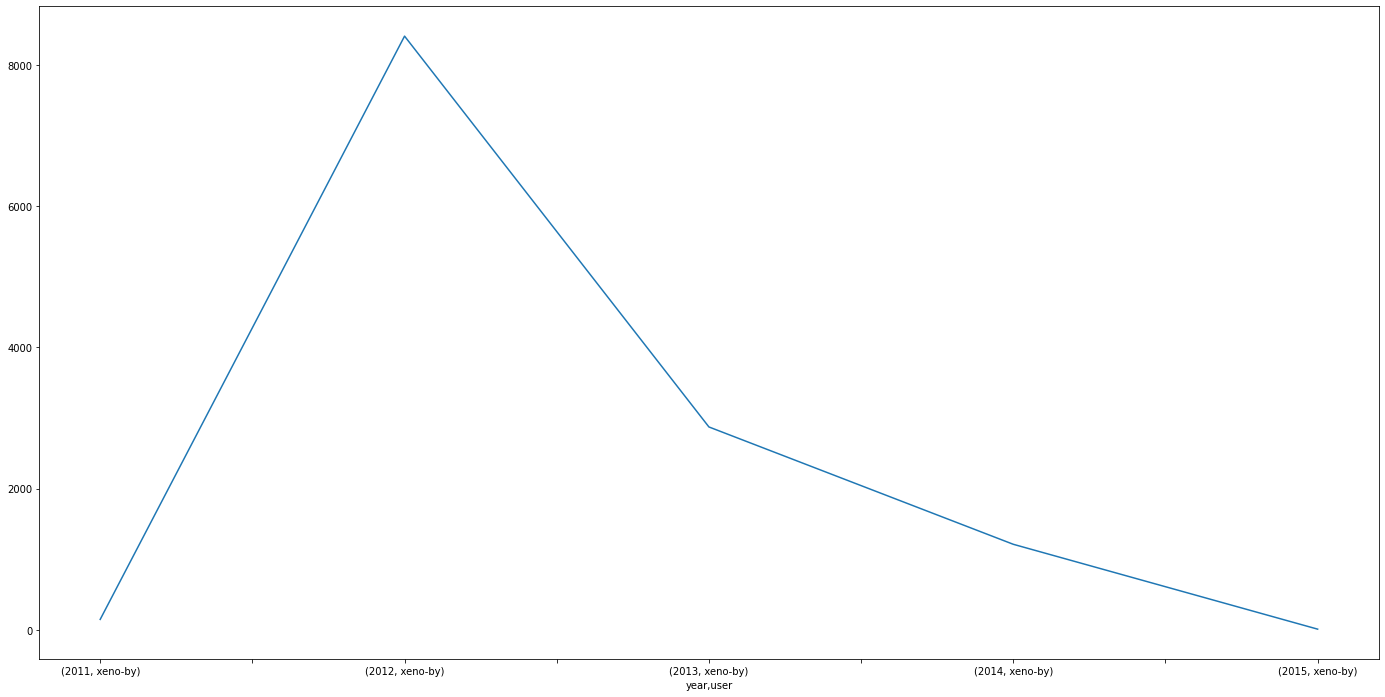

In [151]:
merged_df[merged_df['user'] == 'xeno-by'].groupby('year')['user'].value_counts().plot(figsize = (24,12))

In [153]:
merged_df[merged_df['user'] == 'xeno-by'].groupby('year')['user'].value_counts().sort_index(ascending=False)

year  user   
2015  xeno-by       9
2014  xeno-by    1211
2013  xeno-by    2873
2012  xeno-by    8409
2011  xeno-by     147
Name: user, dtype: int64

<AxesSubplot:xlabel='year,user'>

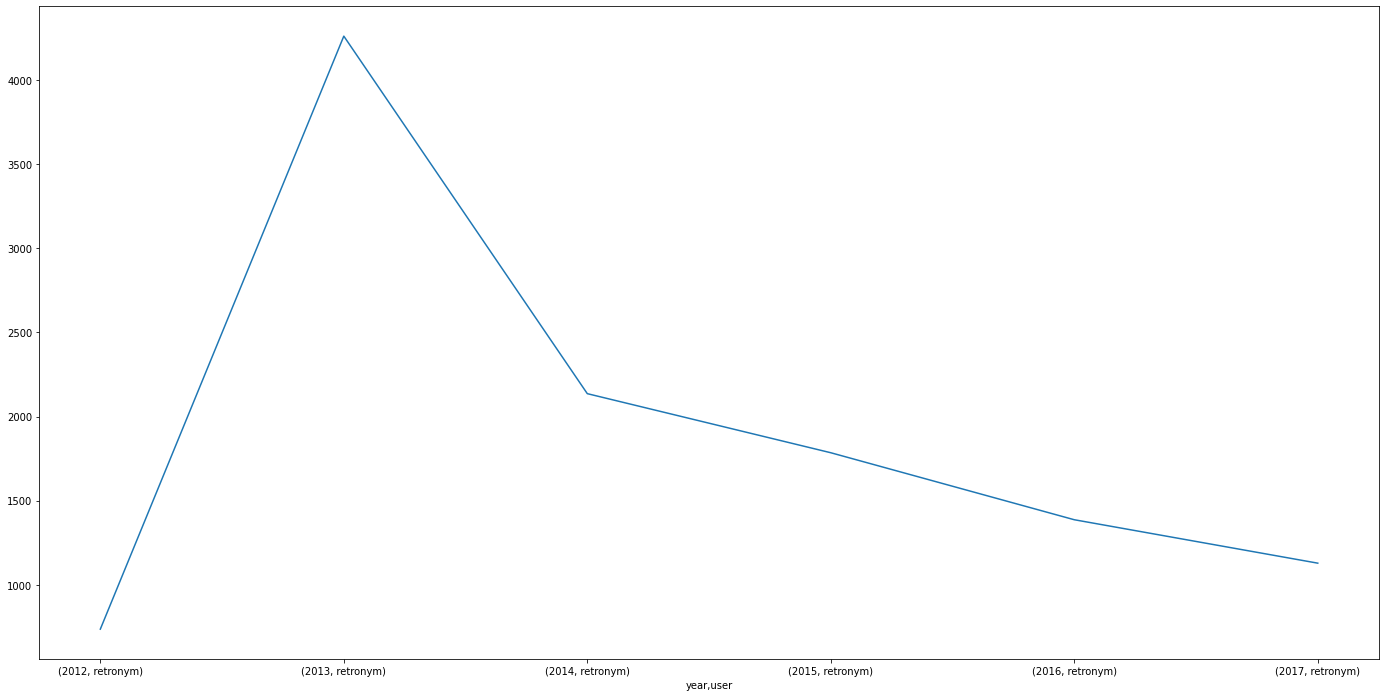

In [152]:
merged_df[merged_df['user'] == 'retronym'].groupby('year')['user'].value_counts().plot(figsize = (24,12))

In [154]:
merged_df[merged_df['user'] == 'retronym'].groupby('year')['user'].value_counts().sort_index(ascending=False)

year  user    
2017  retronym    1129
2016  retronym    1387
2015  retronym    1785
2014  retronym    2136
2013  retronym    4260
2012  retronym     737
Name: user, dtype: int64